### Titanic Data Anaysis using (EDA)
Exploratory Data Analysis (EDA) is like the detective work of data science. Before building models or drawing conclusions, EDA helps you **understand the data’s story**—its structure, quirks, and hidden patterns.

### What EDA Involves
- **Visualizing data**: Using plots like histograms, box plots, scatter plots, and heatmaps to spot trends, outliers, and relationships.
- **Summarizing statistics**: Calculating mean, median, mode, variance, and standard deviation to understand distribution and spread.
- **Detecting anomalies**: Identifying missing values, duplicates, or outliers that could skew results.
- **Understanding relationships**: Exploring how variables interact—whether they’re correlated, dependent, or completely unrelated.



### Why It Matters
- Helps you **choose the right modeling techniques**
- Ensures **data quality** before analysis
- Reveals **insights** that aren’t obvious from raw data
- Guides **feature selection** and transformation

EDA is often the first and most important step in any data project. It’s where intuition meets statistics—and where your dataset starts to speak.



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset

df = pd.read_csv('titanic.csv')

# Display the first few rows

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Exploratory Data Analysis (EDA)
Check the Data Structure
View column names, data types, and summary statistics:

In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

Handle Missing Values
Identify and deal with missing values:

In [3]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fill missing 'Age' values with the median

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6392\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Drop rows with missing 'Embarked' values

In [9]:

df.dropna(subset=['Embarked'], inplace=True)

In [10]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

- 'C' → Cherbourg
- 'Q' → Queenstown
- 'S' → Southampton


Explore Target Variable (Survived)
Check the distribution of the target variable:


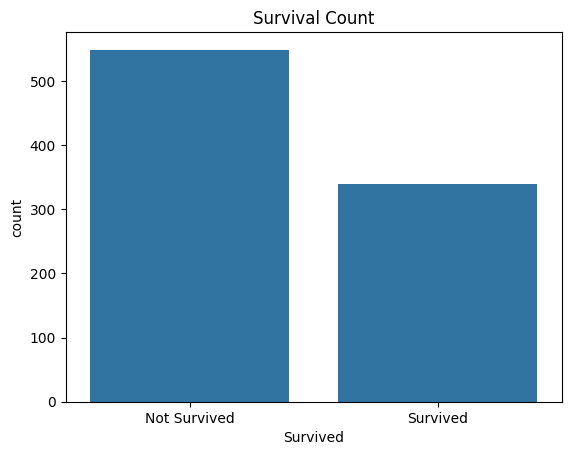

In [12]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

Label Number count for Survived and Not Survived

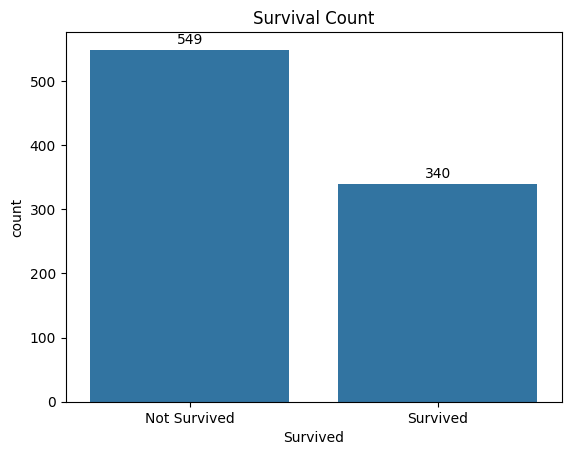

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

# Add number counts on top of the bars
counts = df['Survived'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 4, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

plt.text(): This function in Matplotlib is used to add text to a specific position on the plot.

i: This represents the position of the bar on the x-axis. It's the loop index (e.g., 0 for "Not Survived" and 1 for "Survived").

count + 2: This is the y-coordinate where the text will appear. Here, count is the actual value of the bar, and +2 is added to position the text slightly above the bar for better visibility.

str(count): This converts the numerical count value to a string so it can be displayed as text.

ha='center': The ha parameter specifies the horizontal alignment of the text. 'center' means the text will be horizontally centered relative to the x-coordinate (i).

va='bottom': The va parameter specifies the vertical alignment of the text. 'bottom' aligns the text at the bottom of the specified y-coordinate (count + 2).

fontsize=10: This controls the size of the text font.

Univariate Analysis
Analyze individual columns:
Categorical columns (e.g., Sex, Pclass):

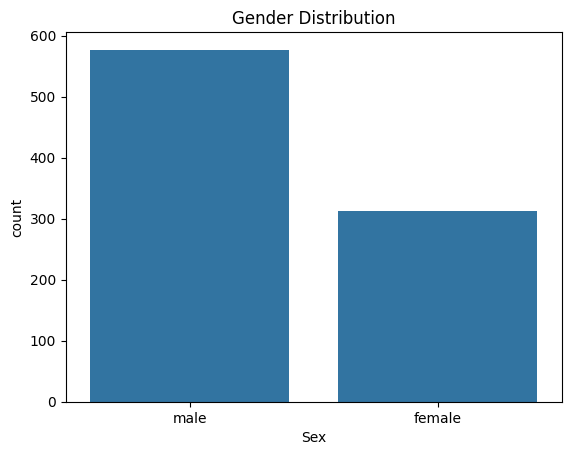

In [16]:
sns.countplot(data=df, x='Sex')
plt.title('Gender Distribution')
plt.show()

Age distribution Analysis

What KDE Represents
- Instead of showing raw counts like a histogram, KDE shows the likelihood of values occurring in a dataset.
- It helps visualize the distribution of data, especially when you want to understand the shape
How It Works
- KDE places a kernel on each data point.
- These curves are then summed to produce a smooth curve that represents the overall distribution.


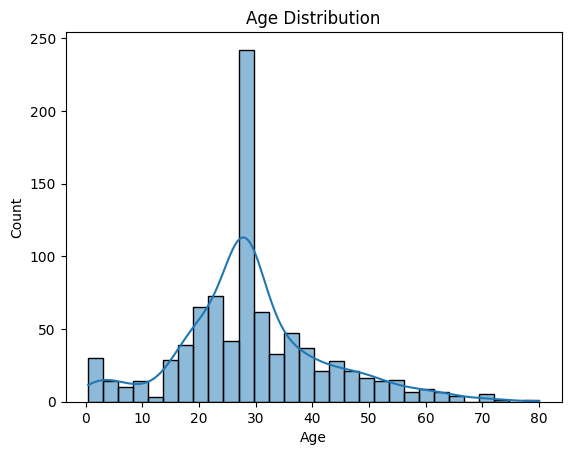

In [18]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Multivariate Analysis
Explore relationships between features:
Survival rate by gender:

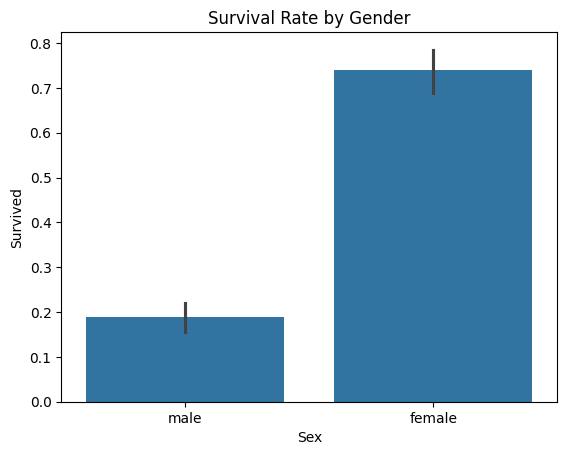

In [19]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

Survival rate by passenger class:

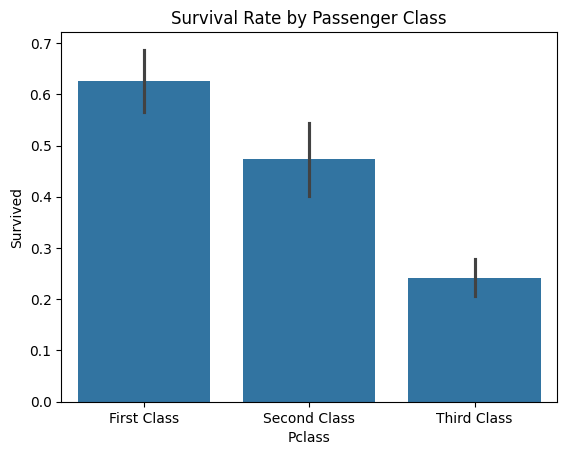

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

# Add labels for Passenger Class
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'])

plt.show()


Correlation heatmap:

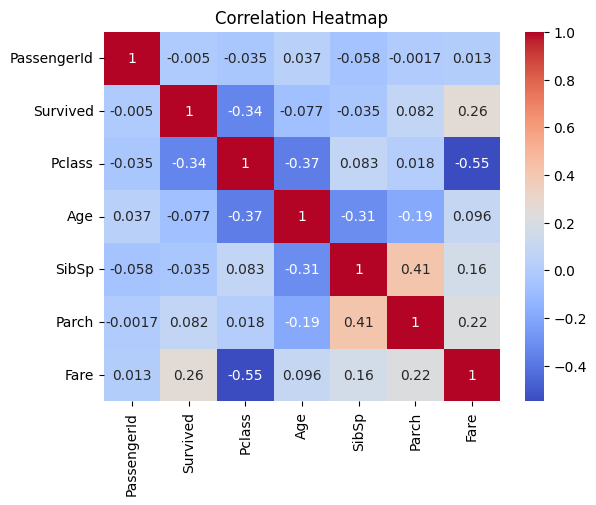

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset

df = pd.read_csv('titanic.csv')
df = df.select_dtypes(include='number')
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering
Create new features, such as "Family Size":

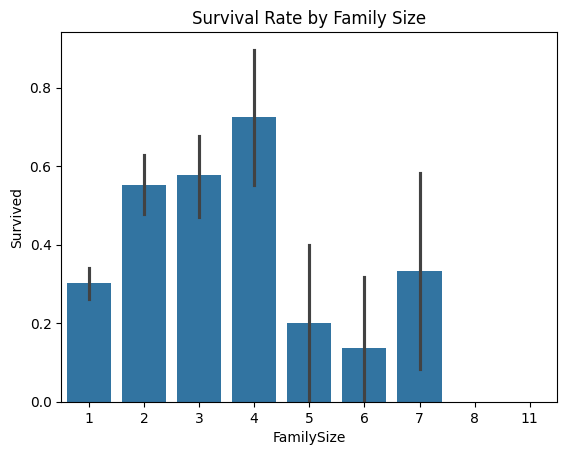

In [ ]:

#SibSp -- Numbers of Siblings
#Parch -- Numbers of Parents
# +1 - Including self individual.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.show()

In [33]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Model Preparation
Split the dataset into training and testing sets:


In [34]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating Model using Linear Regression

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Load the dataset

df = pd.read_csv('titanic.csv')

# Handle missing values (example)

df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6392\3503909800.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [37]:
# Encode categorical variables

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Feature and target selection
# For Linear Regression: Use a single feature (e.g., 'Age')

X_linear = df[['Age']].values
y = df['Fare'].values  # Assuming 'Fare' is the target variable

In [40]:
# For Multiple Linear Regression: Use multiple features

X_multi = df[['Pclass', 'Sex', 'Age']].values

Create seperate Train and Test Model for Linear and Multiple Linear Regression model

In [42]:
# Linear Regression

X_linear_train, X_linear_test, y_train, y_test = train_test_split(X_linear, y, test_size=0.2, random_state=42)

# Multiple Linear Regression

X_multi_train, X_multi_test, _, _ = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [43]:
#Linear Regression

# Create the model

linear_model = LinearRegression()

In [44]:
linear_model.fit(X_linear_train, y_train)

LinearRegression()

In [45]:
y_linear_pred = linear_model.predict(X_linear_test)

In [46]:
# Evaluate the model

print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_linear_pred))
print("R-squared:", r2_score(y_test, y_linear_pred))

Linear Regression:
Mean Squared Error: 2652.6945779801044
R-squared: 0.0057156696562721265


Multiple Linear Regression

In [47]:


# Create the model

multi_linear_model = LinearRegression()

In [48]:
# Train the model

multi_linear_model.fit(X_multi_train, y_train)

LinearRegression()

In [49]:
# Make predictions

y_multi_pred = multi_linear_model.predict(X_multi_test)

In [50]:
# Evaluate the model

print("\nMultiple Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_multi_pred))
print("R-squared:", r2_score(y_test, y_multi_pred))


Multiple Linear Regression:
Mean Squared Error: 1843.5274552203737
R-squared: 0.3090081019882065


Explanation:
Linear Regression: Uses a single independent variable (Age) to predict the target (Fare).

Multiple Linear Regression: Uses multiple independent variables (Pclass, Sex, and Age) to predict the target.